# Linear Regression and Gradiant Descent
XUE FU

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

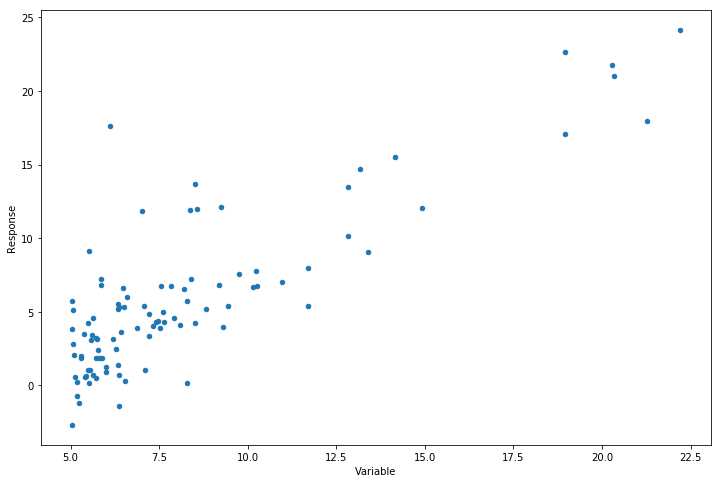

In [36]:
path = 'lineardata.txt'

data = pd.read_csv(path, header=None,names=['Variable', 'Response'])
data.head()

data.plot(kind='scatter', x='Variable', y='Response', figsize=(12,8))
plt.show()

In [30]:
data.describe()

,Variable,Response Variable
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [37]:
# Define cost function
def costFunction(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

# Insert 1 in the 0 column, column name is Ones
data.insert(0, 'Ones', 1)
 
# set X (training data) and y (target variable)
# cols = 3
cols = data.shape[1]
X = data.iloc[:,0:cols-1] 
y = data.iloc[:,cols-1:cols]

# Compute cost function
X = np.matrix(X.values)
y = np.matrix(y.values)

theta = np.matrix(np.array([0,0]))
costFunction(X, y, theta)

32.072733877455676

In [38]:
# Gradiant descent
# alpha: learning rate
# Iterature: iterature times
def gradientDescent(X, y, theta, alpha, iteration):
    temp = np.matrix(np.zeros(theta.shape)) #theta.shape=(1,2)
    parameters = int(theta.ravel().shape[1]) #ravel() dimention reduction
    cost = np.zeros(iters)                      
    
    for i in range(iteration):                       
        error = (X * theta.T) - y
        
        for j in range(parameters):               
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = costFunction(X, y, theta) #store the cost after each iteration
        
    return theta, cost
 
alpha = 0.01
iters = 1500

In [39]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

costFunction(X, y, g)

4.483388256587726

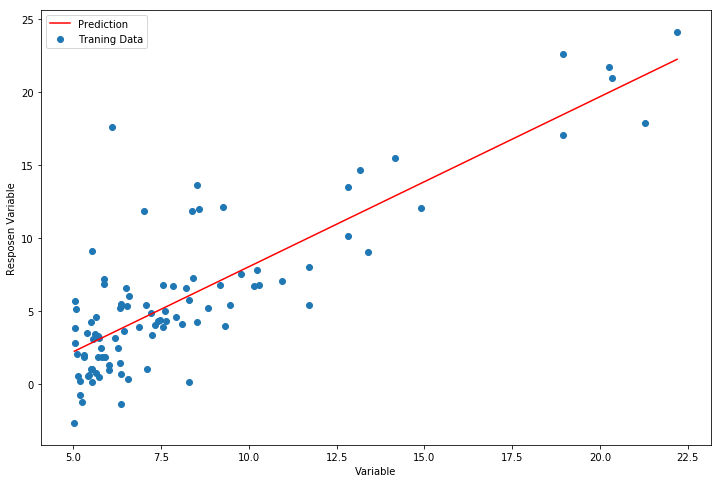

In [41]:
x = np.linspace(data.Variable.min(), data.Variable.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
 
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Variable, data.Response, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Variable')
ax.set_ylabel('Resposen Variable')
plt.show()

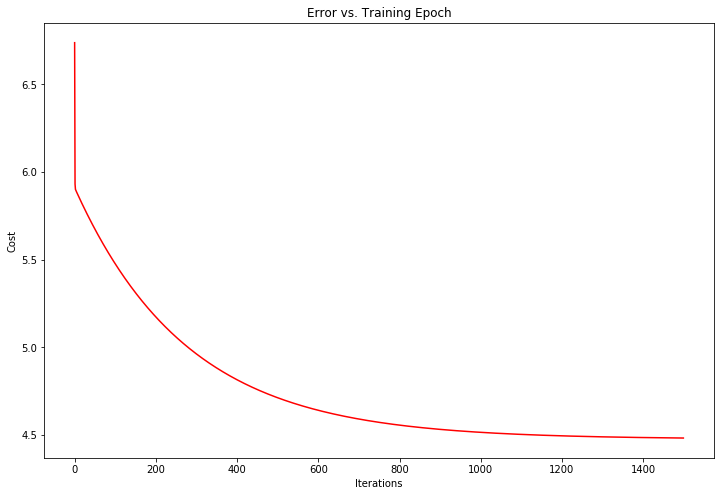

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()